In [84]:
import pickle
import numpy as np
import matplotlib
import matplotlib.path as mplPath
import matplotlib.pyplot as plt
import os
import math
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

sarco =  False
fatigue = False

if sarco:
    name = '2024_02_17_18_56_59'
    env_name = 'myoSarcLegReachFixed-v3'
elif fatigue:
    name = '2024_02_20_15_03_01'
    env_name = 'myoFatiLegReachFixed-v4'
else:
    name = '2024_02_17_20_19_05'
    env_name = 'myoLegReachFixed-v2'
steps = 1000
pkl_path = './output/PKL/' + env_name + '/'
ep = 100


def load_pickle(file_path):
    with open(file_path, 'rb') as file:
        return pickle.load(file)

image_path = './image/' + env_name + '/' + name
os.makedirs(image_path, exist_ok=True)

bins = [ 10, 20, 30, 40, 50, 60]

In [85]:
AP_pert = []
AP_pert_1, ML_pert_1= [], []#this is only used for the scatter stand/fall plot
stand = []
fall = []
pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP = [], [], [], [], []
pert_1_ML, pert_2_ML, pert_3_ML, pert_4_ML, pert_5_ML = [], [], [], [], []
for i in range(ep):
    file_path = pkl_path + name+f'_{i}.pkl'  # Replace with actual file paths
    data = load_pickle(file_path)
    height = data['bodyInfo']['height']
    if height > 0.5:
        stand.append(data.copy())
    else:
        fall.append(data.copy())
    
    if data['modelInfo']['perturbationDirection'] == 1:
        AP_pert_1.append(data)
    else:
        ML_pert_1.append(data)

print(len(stand))


98


In [86]:
for data in stand:
    if data['modelInfo']['perturbationDirection'] == 1:
        AP_pert.append(data)
        if bins[0] <= data['modelInfo']['perturbationMagnitude'] <= bins[1]:
            pert_1_AP.append(data)
        elif bins[1] <= data['modelInfo']['perturbationMagnitude'] <= bins[2]:
            pert_2_AP.append(data)
        elif bins[2] <= data['modelInfo']['perturbationMagnitude'] <= bins[3]:
            pert_3_AP.append(data)
        elif bins[3] <= data['modelInfo']['perturbationMagnitude'] <= bins[4]:
            pert_4_AP.append(data)
        else:
            pert_5_AP.append(data)
    else:
        ML_pert.append(data)
        if 0 <= data['modelInfo']['perturbationMagnitude'] <= 10:
            pert_1_ML.append(data)
        elif 10 <= data['modelInfo']['perturbationMagnitude'] <= 20:
            pert_2_ML.append(data)
        elif 20 <= data['modelInfo']['perturbationMagnitude'] <= 30:
            pert_3_ML.append(data)
        elif 30 <= data['modelInfo']['perturbationMagnitude'] <= 40:
            pert_4_ML.append(data)
        else:
            pert_5_ML.append(data)

    
pert_AP = [pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP]

In [87]:
ankle_angle_l, ankle_angle_r  = [], []#, hip_adduction_l, hip_adduction_r, hip_rotation_l, hip_rotation_r = [], [], [], [], [], []
hip_flexion_l, hip_flexion_r = [], []

joint_name_qpos = [ankle_angle_l, ankle_angle_r, hip_flexion_l, hip_flexion_r ] #hip_adduction_l, hip_adduction_r, hip_rotation_l, hip_rotation_r,  

ankle_angle_l_t, ankle_angle_r_t, hip_adduction_l_t, hip_adduction_r_t, hip_rotation_l_t = [], [], [], [], []
hip_rotation_r_t, hip_flexion_l_t, hip_flexion_r_t = [], [], []

joint_name_torque = [ankle_angle_l_t, ankle_angle_r_t, hip_flexion_l_t, hip_flexion_r_t ] #hip_adduction_l_t, hip_adduction_r_t, hip_rotation_l_t, hip_rotation_r_t, 


joint_names_l = ['ankle_angle_l',  'hip_flexion_l'] #'hip_adduction_l', 'hip_rotation_l',
title = ['Ankle',  'Hip Flexion'] #'Hip Adduction', 'Hip Rotation', 
joint_names_r = ['ankle_angle_r', 'hip_flexion_r' ] #'hip_adduction_r','hip_rotation_r',

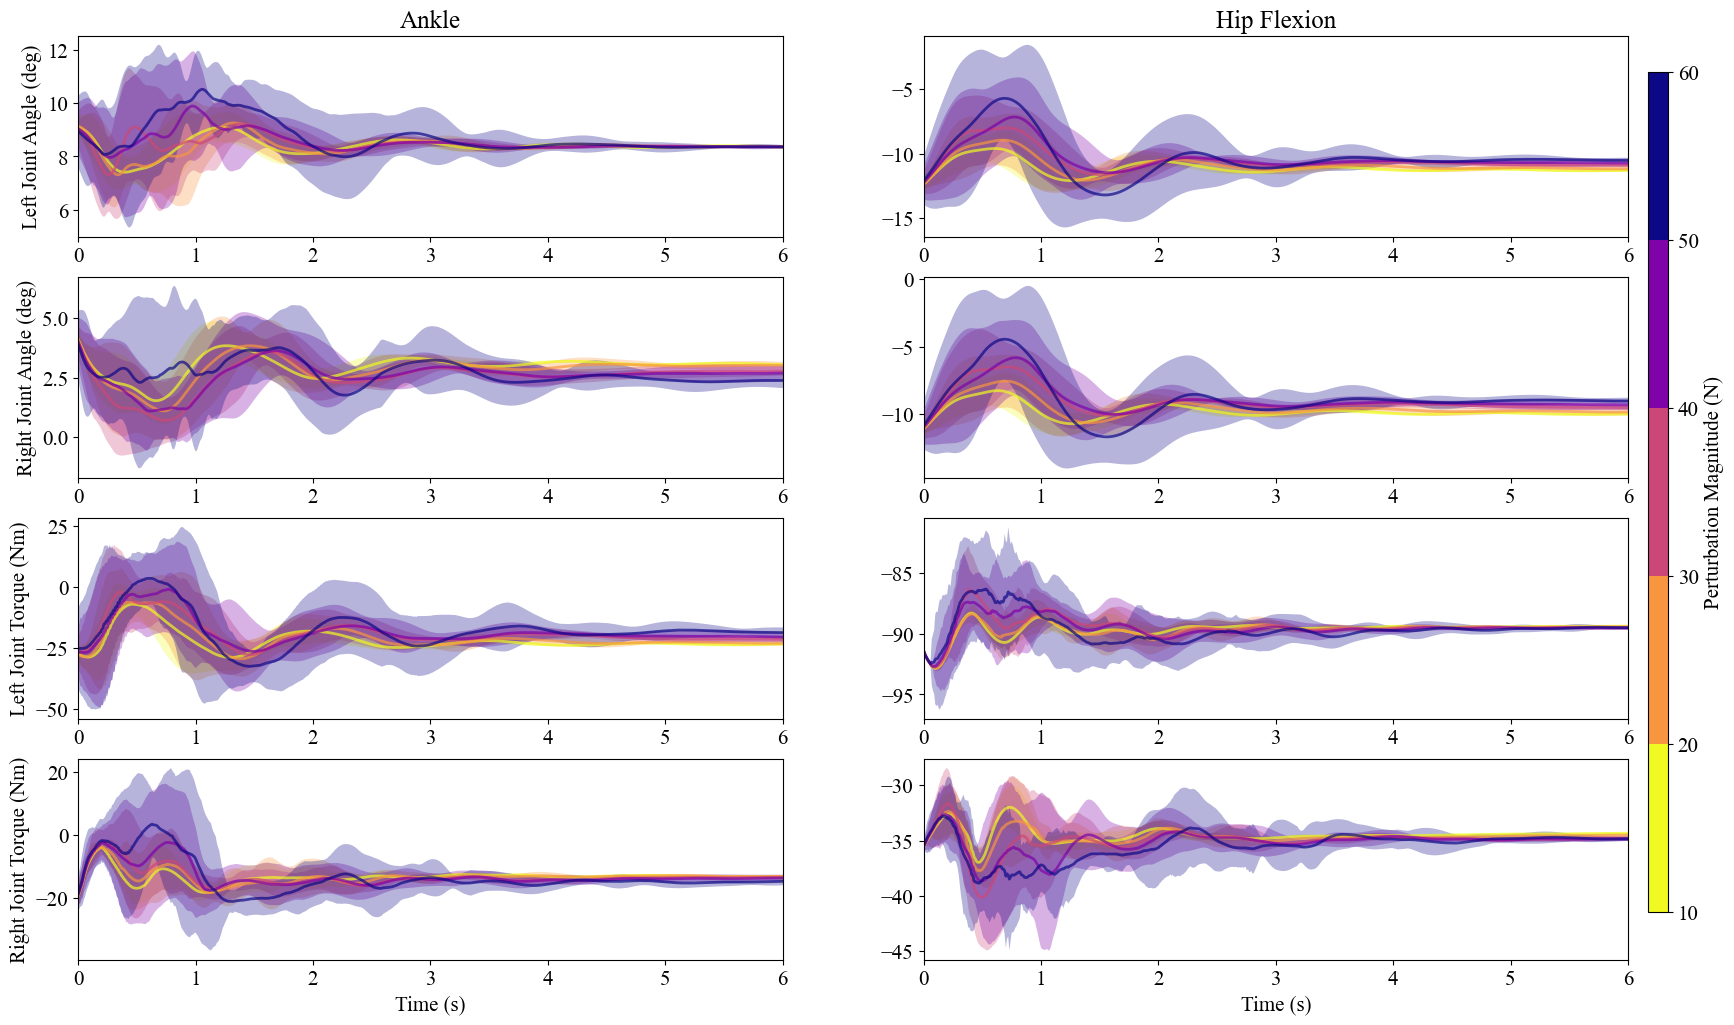

In [88]:
#####plotting the joint angle over time for standing up case
plt.rcParams.update({
    "font.family": "Times New Roman",  # specify font family here
    "font.size":15}) 

y_range_joint = [-50, 50]
x_time = np.linspace(0, 9, 900)

colormap = plt.cm.plasma_r
norm = mcolors.BoundaryNorm(bins, colormap.N)
fig, ax = plt.subplots(4, 2, figsize=(20, 12))
#fig= plt.figure(figsize=(20, 12))
for i in range(0, 2):
    plt.subplot(4, 2, i+1)
    for j in range(len(pert_AP)):
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        mean_pert = []
        for k in pert_AP[j]:
            l[j].append(k['jointInfo']['qpos'][joint_names_l[i]][100:])
            mean_pert.append(k["modelInfo"]["perturbationMagnitude"])
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)*180/np.pi
            std = np.std(l[j], axis = 0)*180/np.pi
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0)*180/np.pi, c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
    plt.title(title[i])
    if i == 0:
        plt.ylabel('Left Joint Angle (deg)')

######

for i in range(0, 2):
    plt.subplot(4, 2, i+3)
    for j in range(len(pert_AP)):
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        mean_pert = []
        for k in pert_AP[j]:
            l[j].append(k['jointInfo']['qpos'][joint_names_r[i]][100:])
            mean_pert.append(k["modelInfo"]["perturbationMagnitude"])
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)*180/np.pi
            std = np.std(l[j], axis = 0)*180/np.pi
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0)*180/np.pi, c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
    if i == 0:
        plt.ylabel('Right Joint Angle (deg)')


for i in range(0, 2):
    plt.subplot(4, 2, i+5)
    for j in range(len(pert_AP)):
        mean_pert = []
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        for k in pert_AP[j]:
            l[j].append(k['jointInfo']['qtau'][joint_names_l[i]][100:])
            mean_pert.append(k["modelInfo"]["perturbationMagnitude"])
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)
            std = np.std(l[j], axis = 0)
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0), c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
    if i == 0:
        plt.ylabel('Left Joint Torque (Nm)')


for i in range(0, 2):
    plt.subplot(4, 2, i+7)
    for j in range(len(pert_AP)):
        mean_pert = []
        l1, l2, l3, l4, l5 = [], [], [], [], []
        l = [l1, l2, l3, l4, l5]
        for k in pert_AP[j]:
            l[j].append(k['jointInfo']['qtau'][joint_names_r[i]][100:])
            mean_pert.append(k["modelInfo"]["perturbationMagnitude"])
        if not l[j]:
            continue
        else:
            mean = np.mean(l[j], axis = 0)
            std = np.std(l[j], axis = 0)
            upper = mean + 2*std
            lower = mean - 2*std
            plt.plot(x_time, np.mean(l[j], axis= 0), c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
            plt.fill_between(x_time, lower.flatten(), upper.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
            plt.xlabel('Time (s)')
    if i == 0:
        plt.ylabel('Right Joint Torque (Nm)')

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm) 
sm.set_array([]) 

plt.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
cbar = plt.colorbar(sm, ticks=np.linspace(10, 60, 6), cax=cbar_ax) 
cbar.set_label('Perturbation Magnitude (N)')

#txt="The ankle and hip angles (adduction, rotation and flexion) in response to perturbation in the range of 10  - 60N"
#plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=20)
plt.setp(ax, xlim=[0, 6])
plt.show()
plt.close()


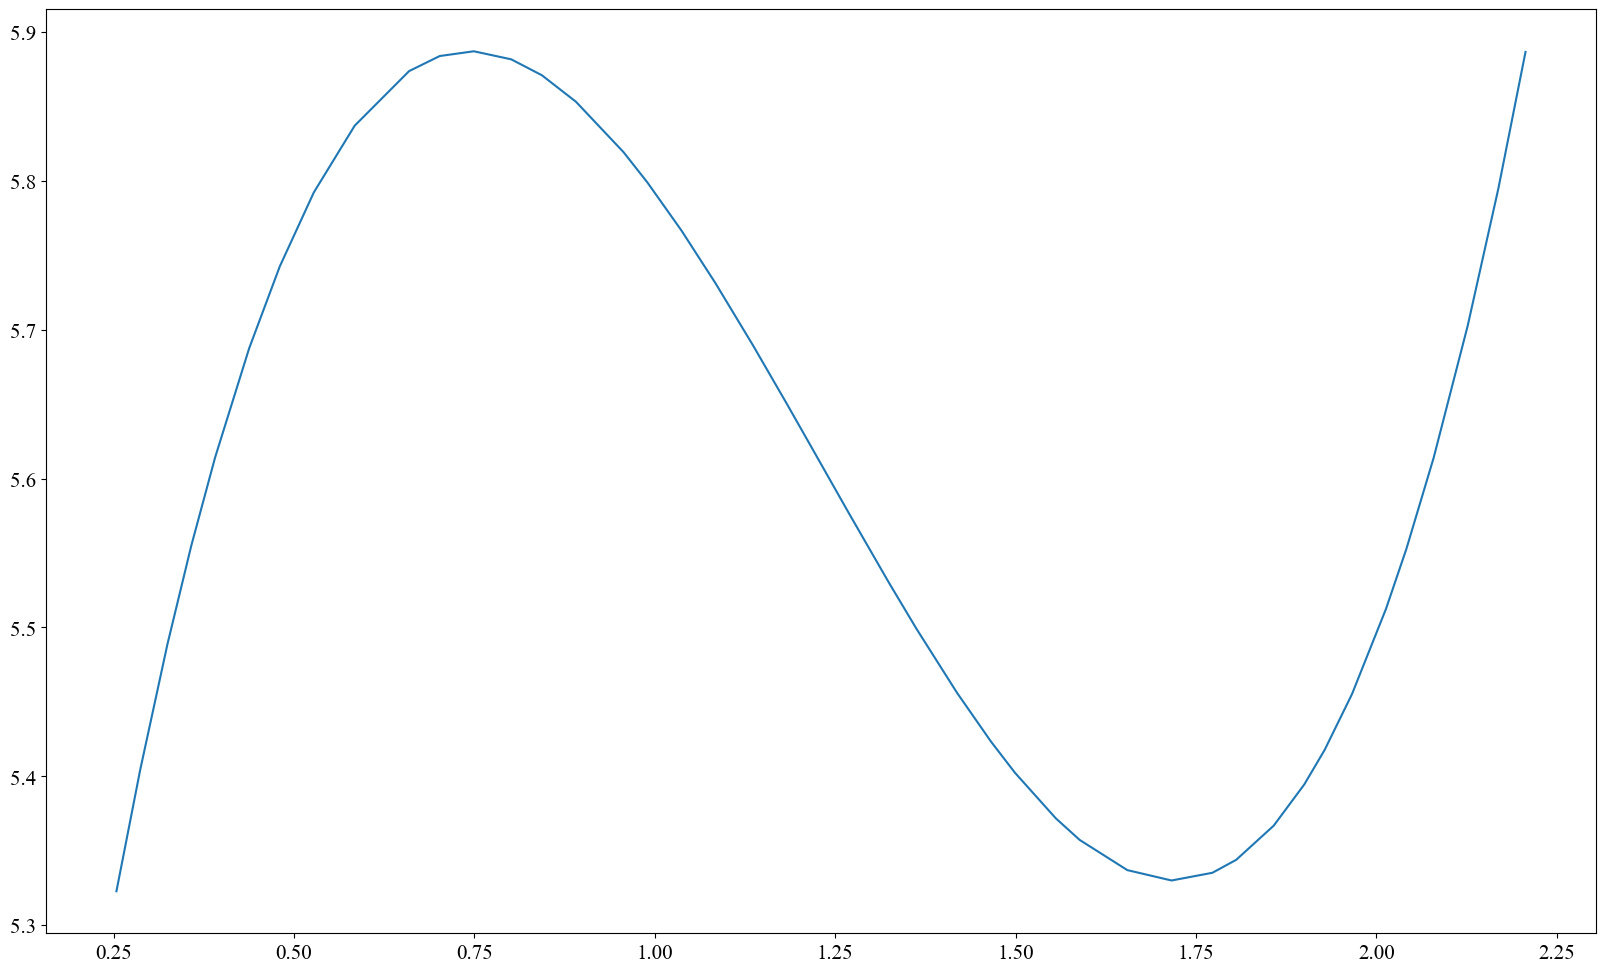

In [89]:
from scipy.interpolate import splrep, splev
all_ankle = []
for k in AP_pert:
    all_ankle.append(k['jointInfo']['qpos']['ankle_angle_l'])
    all_ankle.append(k['jointInfo']['qpos']['ankle_angle_r'])
    #print(k['jointInfo']['qpos']['ankle_angle_l'])
all_ankle_mean = np.mean(all_ankle, axis=0)*180/np.pi

x_exp = [5.853773490975483, 5.853773490975483, 5.886792391718989, 5.924528201166481, 5.957547101909987, 5.990566002653494, 6.037735809447493, 6.080188707537505, 6.127358514331505, 6.183962138533477, 6.259433937366995, 6.259433937366995, 6.301886655518475, 6.349056462312474, 6.400943357748993, 6.400943357748993, 6.4433960759004725, 6.490565882694471, 6.556603684181484, 6.58962258492499, 6.636792391718989, 6.683962198512988, 6.735848914010974, 6.783018720804973, 6.820754710190998, 6.867924516984997, 6.92452814118697, 6.962264130572996, 7.018867754774969, 7.066037561568968, 7.15566026645298, 7.099056642251007, 7.188678987257953, 7.254716788744965, 7.31603768152799, 7.372641305729962, 7.457547101909988, 7.457547101909988, 7.5, 7.528301812100986, 7.566037441609946, 7.641509420381998, 7.641509420381998, 7.613207248403945, 7.679245049890957, 7.726414856684956, 7.768867754774969, 7.806603744160995, 7.405660386412002]
y_exp = [5.128205261966124, 5.128205261966124, 5.316239472293811, 5.4358973690169385, 5.5897434225423455, 5.709400993223045, 5.846153620432165, 5.931623686395439, 5.9658111911128655, 5.98290592159886, 5.931623686395439, 5.931623686395439, 5.914529934036726, 5.914529934036726, 5.914529934036726, 5.914529934036726, 5.829059868073452, 5.829059868073452, 5.794871059186319, 5.760683554468892, 5.743589802110179, 5.675213488505619, 5.6068375009434845, 5.555555591782492, 5.470085525819218, 5.401709538257085, 5.36752072936995, 5.418803290615798, 5.418803290615798, 5.418803290615798, 5.401709538257085, 5.4358973690169385, 5.36752072936995, 5.401709538257085, 5.36752072936995, 5.418803290615798, 5.384615459855945, 5.384615459855945, 5.36752072936995, 5.452990795333224, 5.504273356579072, 5.623930927259771, 5.623930927259771, 5.5213674349802115, 5.658119736146905, 5.709400993223045, 5.777777632870032, 5.777777632870032, 5.401709538257085]
x_out = []
for i in x_exp:
    x_out.append(i-5.6)
x_out.sort()
bspl = splrep(x_out, y_exp,s=5)
bspl_y = splev(x_out,bspl)

fig = plt.figure(figsize=(20, 12))
plt.plot(x_out, bspl_y)
#plt.plot(x_time, all_ankle_mean)
#plt.show()

Text(0.5, 0.98, 'COM Velocity change in Standing Case (cm/s)')

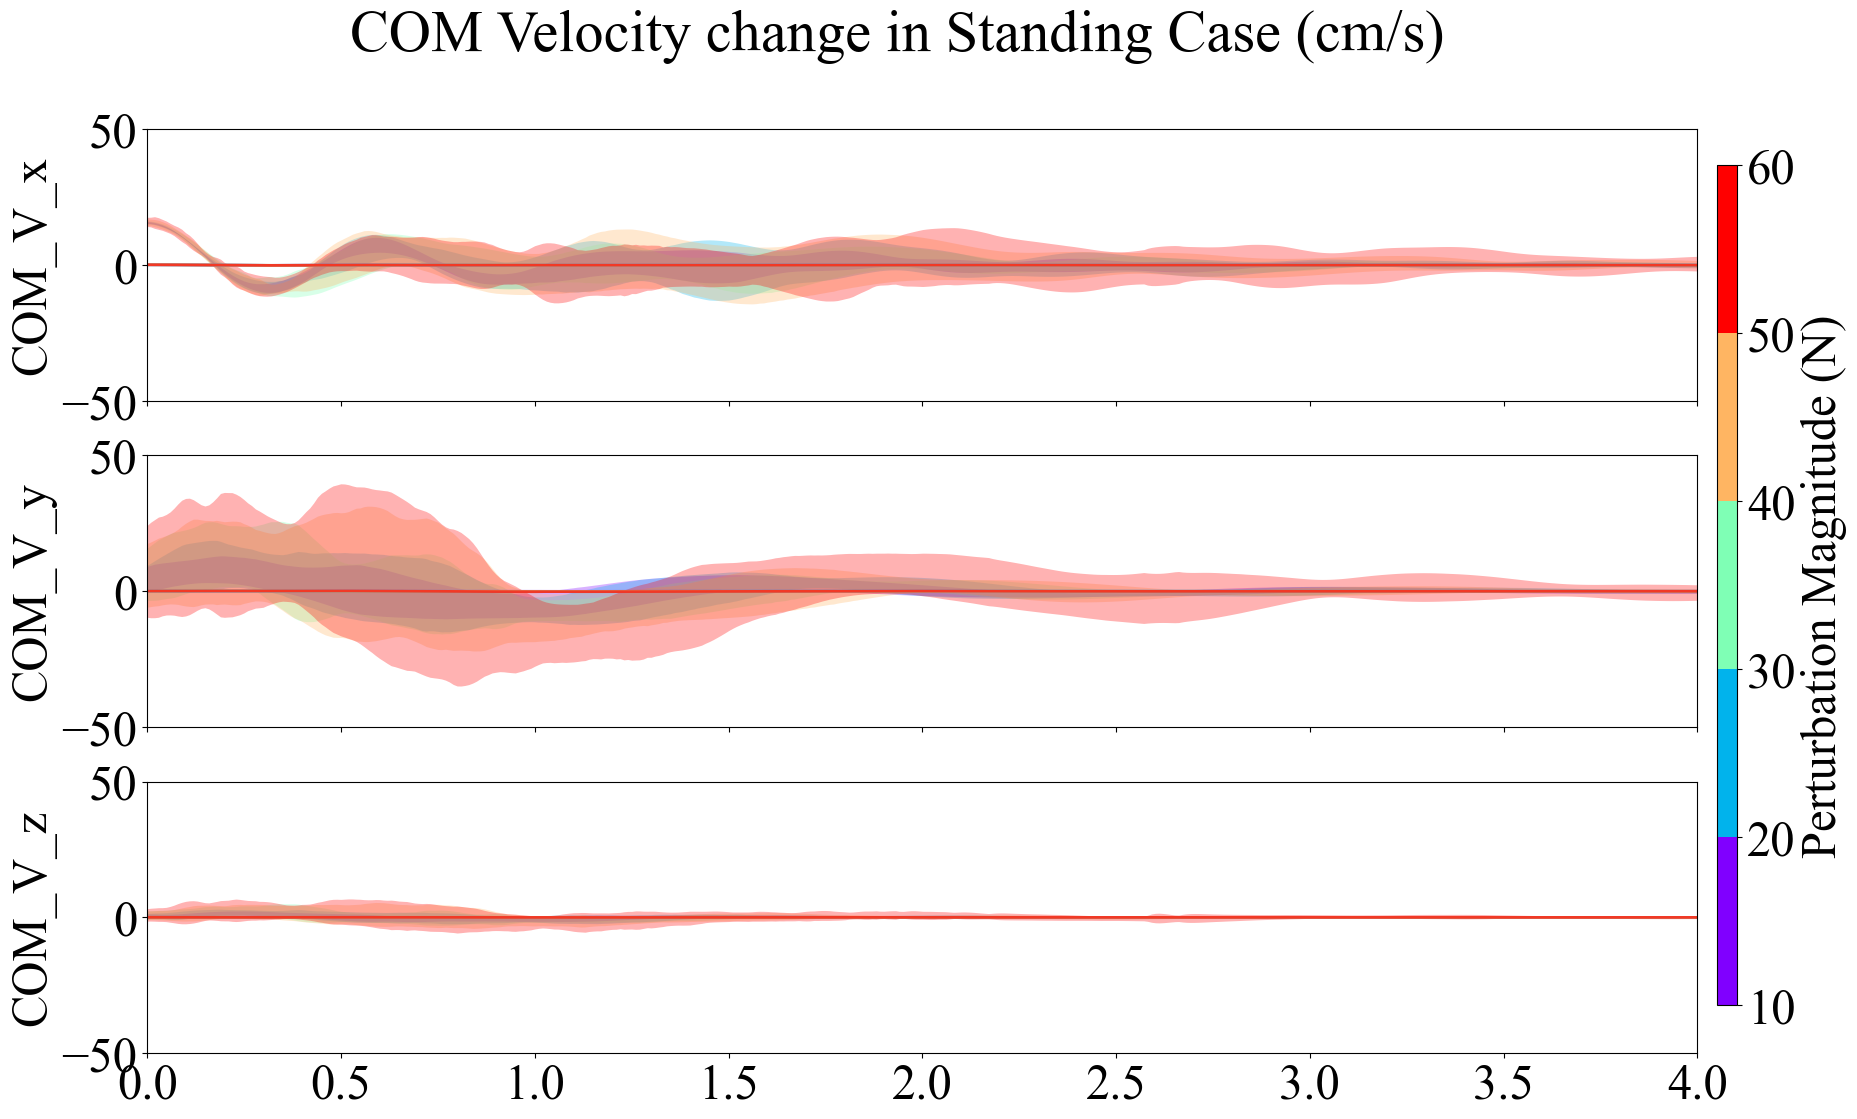

In [90]:
plt.rcParams.update({
    "font.family": "Times New Roman",  # specify font family here
    "font.size":35}) 

colormap = plt.cm.rainbow
norm = mcolors.BoundaryNorm(bins, colormap.N)

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 12), sharex=True)
for j in range(len(pert_AP)):
    l1, l2, l3, l4, l5= [], [], [], [], []
    l = [l1, l2, l3, l4, l5]
    mean_pert = []
    for k in pert_AP[j]:
        l[j].append(k['bodyInfo']['com_v'])
        mean_pert.append(k["modelInfo"]["perturbationMagnitude"])
    if not l[j]:
        continue
    else:
        mean = np.mean(l[j], axis = 0)*100
        std = np.std(l[j], axis = 0)*100
        upper_x = mean[100:,0] + 2*std[100:,0]
        lower_x = mean[100:,0] - 2*std[100:,0]
        upper_y = mean[100:,1] + 2*std[100:,1]
        lower_y = mean[100:,1] - 2*std[100:,1]
        upper_z = mean[100:,2] + 2*std[100:,2]
        lower_z = mean[100:,2] - 2*std[100:,2]
        ax[0].set_ylabel(f'COM_V_x')
        ax[0].plot(x_time, np.mean(l[j], axis= 0)[100:,0], c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
        ax[0].fill_between(x_time, lower_x.flatten(), upper_x.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
        ax[1].set_ylabel(f'COM_V_y')
        ax[1].plot(x_time, np.mean(l[j], axis= 0)[100:,1], c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
        ax[1].fill_between(x_time, lower_y.flatten(), upper_y.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
        ax[2].set_ylabel(f'COM_V_z')
        ax[2].plot(x_time, np.mean(l[j], axis= 0)[100:,2], c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
        ax[2].fill_between(x_time, lower_z.flatten(), upper_z.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm) 
sm.set_array([]) 

plt.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
cbar = plt.colorbar(sm, ticks=np.linspace(10, 60, 6), cax=cbar_ax) 
cbar.set_label('Perturbation Magnitude (N)')

plt.setp(ax, xlim=[0, 4], ylim = [-50, 50])
fig.suptitle('COM Velocity change in Standing Case (cm/s)')

Text(0.5, 0.98, 'COM Velocity change in Falling Case (cm/s)')

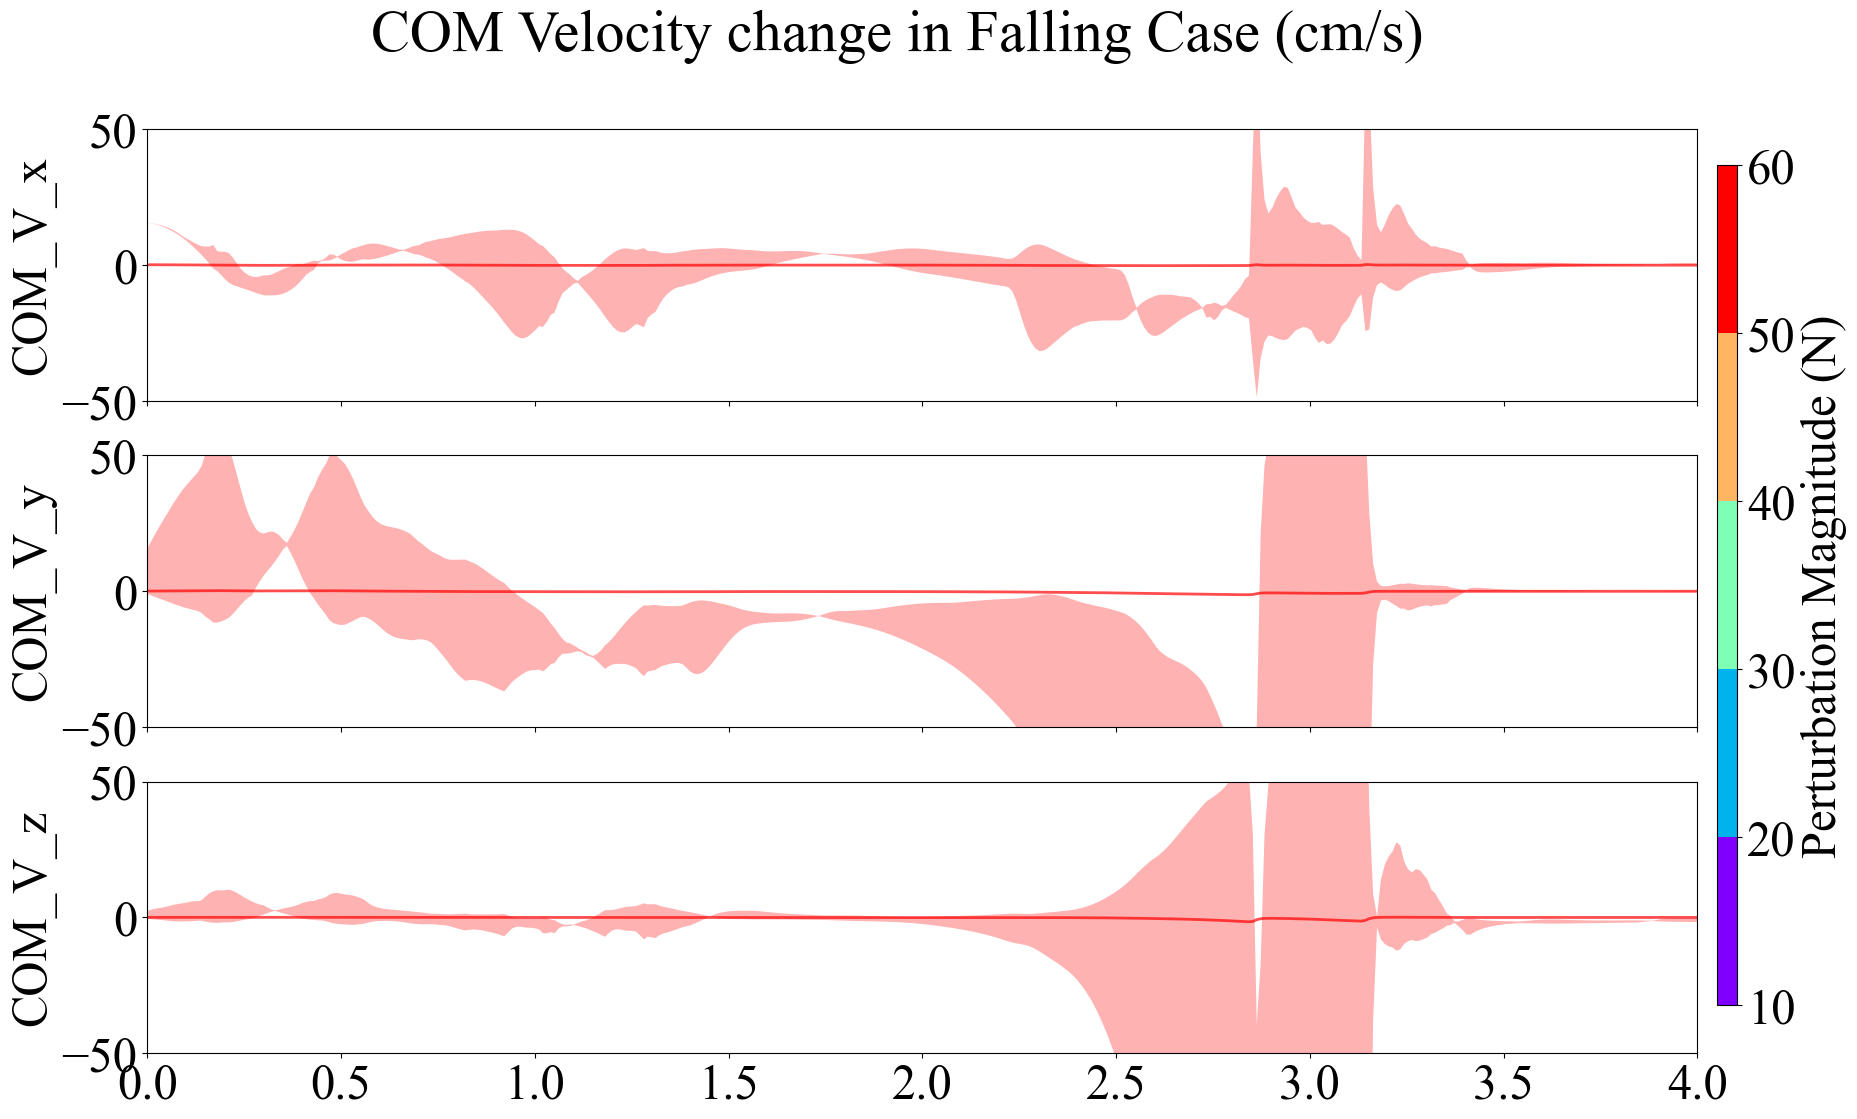

In [91]:
pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP = [], [], [], [], []

for data in fall:
    if data['modelInfo']['perturbationDirection'] == 1:
        AP_pert.append(data)
        if bins[0] <= data['modelInfo']['perturbationMagnitude'] <= bins[1]:
            pert_1_AP.append(data)
        elif bins[1] <= data['modelInfo']['perturbationMagnitude'] <= bins[2]:
            pert_2_AP.append(data)
        elif bins[2] <= data['modelInfo']['perturbationMagnitude'] <= bins[3]:
            pert_3_AP.append(data)
        elif bins[3] <= data['modelInfo']['perturbationMagnitude'] <= bins[4]:
            pert_4_AP.append(data)
        else:
            pert_5_AP.append(data)
    else:
        ML_pert.append(data)
        if 0 <= data['modelInfo']['perturbationMagnitude'] <= 10:
            pert_1_ML.append(data)
        elif 10 <= data['modelInfo']['perturbationMagnitude'] <= 20:
            pert_2_ML.append(data)
        elif 20 <= data['modelInfo']['perturbationMagnitude'] <= 30:
            pert_3_ML.append(data)
        elif 30 <= data['modelInfo']['perturbationMagnitude'] <= 40:
            pert_4_ML.append(data)
        else:
            pert_5_ML.append(data)
pert_AP = [pert_1_AP, pert_2_AP, pert_3_AP, pert_4_AP, pert_5_AP]

fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 12), sharex=True)
for j in range(len(pert_AP)):
    l1, l2, l3, l4, l5= [], [], [], [], []
    l = [l1, l2, l3, l4, l5]
    mean_pert = []
    for k in pert_AP[j]:
        l[j].append(k['bodyInfo']['com_v'])
        mean_pert.append(k["modelInfo"]["perturbationMagnitude"])
    if not l[j]:
        continue
    else:
        mean = np.mean(l[j], axis = 0)*100
        std = np.std(l[j], axis = 0)*100
        upper_x = mean[100:,0] + 2*std[100:,0]
        lower_x = mean[100:,0] - 2*std[100:,0]
        upper_y = mean[100:,1] + 2*std[100:,1]
        lower_y = mean[100:,1] - 2*std[100:,1]
        upper_z = mean[100:,2] + 2*std[100:,2]
        lower_z = mean[100:,2] - 2*std[100:,2]
        ax[0].set_ylabel(f'COM_V_x')
        ax[0].plot(x_time, np.mean(l[j], axis= 0)[100:,0], c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
        ax[0].fill_between(x_time, lower_x.flatten(), upper_x.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
        ax[1].set_ylabel(f'COM_V_y')
        ax[1].plot(x_time, np.mean(l[j], axis= 0)[100:,1], c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
        ax[1].fill_between(x_time, lower_y.flatten(), upper_y.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)
        ax[2].set_ylabel(f'COM_V_z')
        ax[2].plot(x_time, np.mean(l[j], axis= 0)[100:,2], c = colormap(norm(np.mean(mean_pert))), alpha = 0.7, linewidth = 2)
        ax[2].fill_between(x_time, lower_z.flatten(), upper_z.flatten(), facecolor = colormap(norm(np.mean(mean_pert))), alpha = 0.3)

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm) 
sm.set_array([]) 

plt.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.91, 0.15, 0.01, 0.7])
cbar = plt.colorbar(sm, ticks=np.linspace(10, 60, 6), cax=cbar_ax) 
cbar.set_label('Perturbation Magnitude (N)')

plt.setp(ax, xlim=[0, 4], ylim = [-50, 50])
fig.suptitle('COM Velocity change in Falling Case (cm/s)')

[[0.05718657 0.04958979]
 [0.05839606 0.05023902]
 [0.05959387 0.05093334]
 ...
 [0.05778551 0.05919343]
 [0.05778163 0.05918619]
 [0.05777772 0.05917892]]


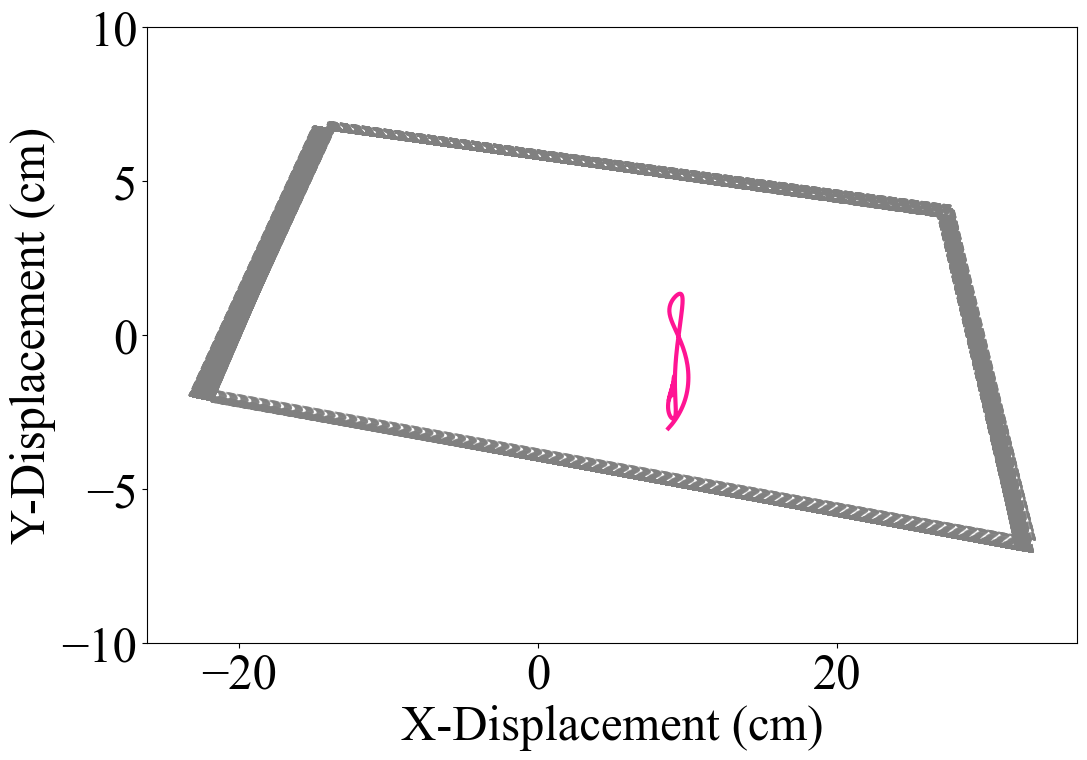

In [92]:
fig, axes = plt.subplots(ncols=1, nrows=1, figsize = (12, 8))

bos_mean = []
com_traj = []
for m in stand:
    bos_mean.append(m['bodyInfo']['bos'][100:])#[-1]#.reshape(2, 4).T
    #print(bos_final)
    com_traj.append(m["bodyInfo"]["com"][100:])
bos_final = np.mean(bos_mean, axis = 0)
com_final = np.mean(com_traj, axis = 0)

print(com_final)
for i in range(900):
    bos = bos_final[i].reshape(2, 5)
    #print(bos)
    plt.plot(bos[0]*100+ 3, bos[1]*100 - 8, alpha = 0.3, linestyle = 'dashed', color = 'grey')
plt.plot(com_final[:,0]*100+3, com_final[:,1]*100 - 8, linewidth = 3, color = 'deeppink')
plt.ylabel('Y-Displacement (cm)')
plt.xlabel('X-Displacement (cm)')
plt.ylim([-10, 10])
plt.show()

[[ 0.05708683  0.04894754]
 [ 0.05828745  0.04983152]
 [ 0.05947737  0.05082161]
 ...
 [ 0.01845526 -0.7222347 ]
 [ 0.01845818 -0.72223532]
 [ 0.01846108 -0.72223593]]


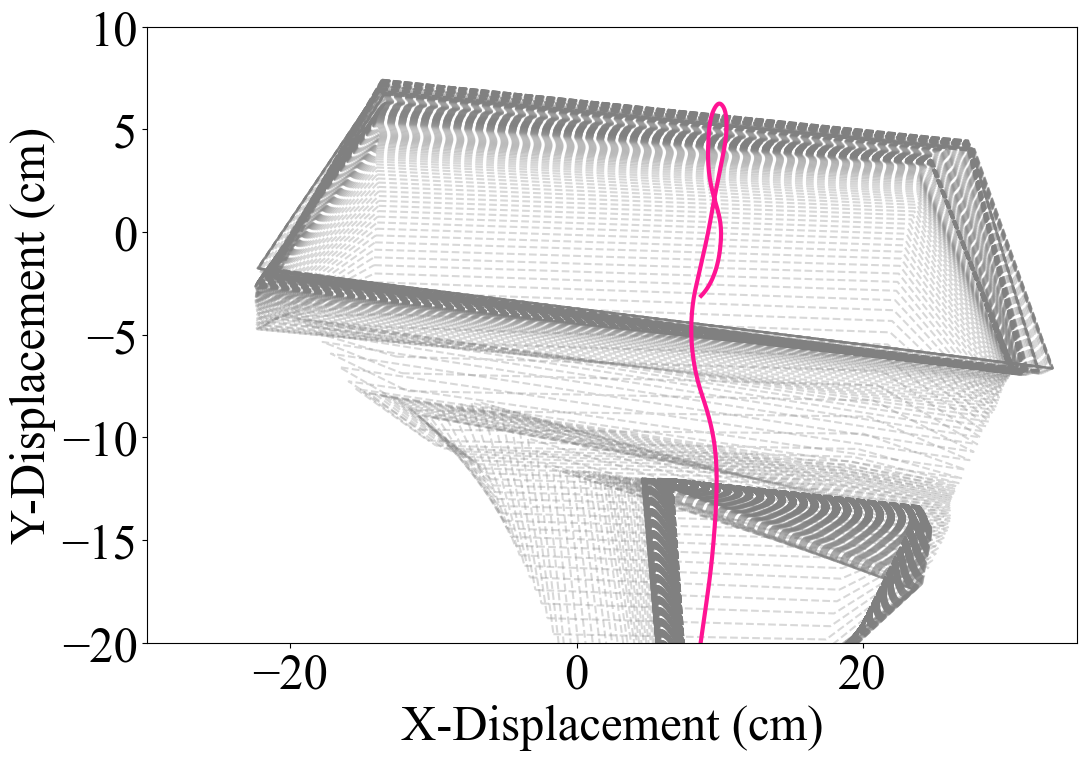

In [94]:
### now we try to understand what is the relationship between COM and the BoS. 

fig, axes = plt.subplots(ncols=1, nrows=1, figsize = (12, 8))

bos_mean = []
com_traj = []
for m in fall:
    bos_mean.append(m['bodyInfo']['bos'][100:])#[-1]#.reshape(2, 4).T
    #print(bos_final)
    com_traj.append(m["bodyInfo"]["com"][100:])
bos_final = np.mean(bos_mean, axis = 0)
com_final = np.mean(com_traj, axis = 0)

print(com_final)
for i in range(900):
    bos = bos_final[i].reshape(2, 5)
    #print(bos)
    plt.plot(bos[0]*100+ 3, bos[1]*100 - 8, alpha = 0.3, linestyle = 'dashed', color = 'grey')
plt.plot(com_final[:,0]*100+3, com_final[:,1]*100 - 8, linewidth = 3, color = 'deeppink')
plt.ylabel('Y-Displacement (cm)')
plt.xlabel('X-Displacement (cm)')
plt.ylim([-20, 10])
plt.xlim([-30, 35])
plt.show()
    